# 1.Introduction

People choose to seek help from tutors to help them overcome their academic challenges. However, with so many teachers on the market, it can be difficult to choose the right teacher.

One of the critical factors that can influence the decision is the cost of private lessons. The prices charged by teachers can based on a large number of factors such as their education, experience, teaching platforms, languages of instruction, location, and more.

While private tutors can be helpful, it is essential to be aware of their pricing. It is not uncommon to come across tutors who overestimate their value and charge exorbitant rates for their services. Therefore, it is important to do research and compare the prices offered by different teachers to predict the correct price that a teacher should charge.

Therefore, in our project, we would like to predict price that is suitable for the teacher characteristics.

# 2. Scraping
## imports

In this section, we will import the necessary libraries and packages for our project.

In [1]:
from langdetect import detect
from translate import Translator
import bs4
from bs4 import BeautifulSoup  
import requests
import pandas as pd
import scipy as sc
import numpy as np
import re
import seaborn as sns

#https://www.apprentus.com/en/private-lessons/online

## scrap teachers links    
In this section, we have scraped all the links from the teachers' pages.
Each page at our URL contained 25 teachers, and we have scraped a total of 281 pages. 
As a result, we have obtained 7025 links to teachers' pages.

In [2]:
list_of_link=[]

for page in range(0,281):
    url=('https://www.apprentus.com/en/private-lessons/online/'+str(page)+'/')
    response=requests.get(url)
    soup=BeautifulSoup(response.content,'html.parser')
    block_of_teachers=soup.find_all('div',{'class':'responsive-image'})
    for teacher in block_of_teachers:
        href=str(teacher)
        link='https://www.apprentus.com'+re.search('href="([^"]+)"', href)[1]
        list_of_link.append(link)

In [4]:
list_of_link

['https://www.apprentus.com/en/private-lessons/phoenix/language/chinese/10-years-experience-full-time-patient-mand',
 'https://www.apprentus.com/en/private-lessons/hague/tutoring/grammar/swedish-adults-students-kids-all-skill-lev',
 'https://www.apprentus.com/en/private-lessons/online/education-et-trainings/sat-prep/prepare-sat-exam-sat1-sat2',
 'https://www.apprentus.com/en/cours-particuliers/en-ligne/soutien-scolaire/maths/untitled-54',
 'https://www.apprentus.com/en/private-lessons/neuchatel/computers-et-electronics/social-media/media-training-workshops-tv-radio',
 'https://www.apprentus.com/en/private-lessons/ixelles-elsene/tutoring/english-students/professional-academic-english-american-ins',
 'https://www.apprentus.com/en/privatunterricht/online/sprachkurs/englisch/untitled-15',
 'https://www.apprentus.com/en/private-lessons/online/language/english/innovative-engaging-english-language-liter',
 'https://www.apprentus.com/en/private-lessons/online/sport-dance-nutrition-et-wellness/

## Lists and Dictionaries
in this section, we will be setting up the base dictionary and lists for our crawling step.

In [5]:
#data structure to containe the data
def create_dic():
    storage={}
    storage["url"]=np.nan
    storage["name"]=np.nan
    storage["location"]=np.nan
    storage["at_student_home"]=np.nan
    storage["at_online"]=np.nan
    storage["at_teacher_home"]=np.nan
    storage["rate"]=np.nan
    storage["review"]=np.nan
    storage["price"]=np.nan
    storage["audience"]=np.nan
    storage["languages"]=np.nan
    storage["picture"]=np.nan
    storage["seniority"]=np.nan
    storage["trusted_teacher"]=np.nan
    storage["levels"]=np.nan
    storage["education"]=np.nan
    return storage

In [6]:
# df_example
storage=create_dic()
df=pd.DataFrame(columns=storage.keys())
df

,url,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,audience,languages,picture,seniority,trusted_teacher,levels,education


In [7]:
#lists:
teach_english=["English"]
teach_French=["French"]
teach_Spanish=["Spanish"] 
teach_arabic=["Arabic"]
teach_Math=["Math", "Algebra", "Statistics","Calculus", "Geometry", "Trigonometry", "Quantitative", 
            "Vector", "calculus", "optimization","Combinatorial"]
teach_Music=["Music", "music","Piano", "Guitar", "Singing", "Violin", "Voice", "Sound",
            "Keyboard", "guitar", "Jazz", "Cello","Bass", "Viola", "flute", "Opera", "Song",
            "Saxophone", "Clarinet", "Audio", "Drums", "Ukulele", "Flute", "recorder", "Ableton", "bass", 
            "Accordion", "Oud", "Trumpet", "Harp", "Woodwinds", "Percussion", "Harpsichord", "recording",
            "Harmonica","Mandolin", "Oboe", "Organ", "gong","Schlagzeug","Trombone"]
teach_sciences=["Physics","Biology","Science","Chemistry", "chemistry", "biology","Biochemistry","Electrical", 
                "circuits", "Mechanical", "Electronic", "Robotics", "Financial", "Microbiology",
                "Pharmacology", "Molecular", "Anatomy", "Neuroscience", "Biotechnology", "Genetics",
                "Iep", "Thermodynamics", "Zoology", "Usmle", "Botany","Biophysics","Chemical","Biomaterial",
                "Biomedical"]
teach_computers=["Computer", "programming", "Microsoft", "engineering", "Python", "development","Adobe","excel",
                "Web", "Engineering", "Java", "Digital", "office", "Javascript", "Algorithms", "software", 
                "Network", "powerpoint", "Developmental", "Database", "Linux", "Numerical", "website",
                "os", "technology", "systems", "analysis", "Animation", "Css", "Html", "Php", "Cad", 
                "animation", "games", "Visual", "windows", "Oracle", "database", "Game","Internet","Google",
                "Mac","macintosh","Unix","seo","Sql","Vb","net","Theology","algorithms","Mysql","Regular","retrieval",
                 "premiere"]
teach_other_languages=["Italian", "German", "Mandarin","chinese","Japanese","Greek",
                        "Turkish", "Dutch", "Russian", "Farsi", "Chinese", "Portuguese", "Korean", "persian",
                        "Hindi", "Vietnamese", "greek", "Latin", "Swedish", "Thai", "Ukrainian", "Hungarian",
                        "Norwegian", "Czech", "Armenian", "Hebrew", "Croatian", "Polish", "Swahili", 
                        "Catalan", "Tamil", "Estonian", "Romanian", "Serbian", "Cantonese", "Sanskrit", "Indonesian",
                        "Bosnian", "Danish", "Punjabi", "Bulgarian", "Albanian","Valencian","Urdu",
                        "Georgian","Creole","Mongolian","language","asl"]
teach_language_skills=["Grammar","Vocabulary", "Writing","writing", "Reading", "Spelling","speaking",
                        "Speech", "Language", "language", "Proofreading", "Storytelling", "Ssat", "Phonetics", 
                        "reading", "Gre", "Calligraphy","Etiquette","Cognition", "expressions"]
teach_humanities=["Literature", "Culture", "history","Ancient","Psychology",
                    "Geography", "History", "Philosophy", "Humanities", "Sociology", "Architecture", "psychology",
                    "Religion", "spirituality", "Religious", "Physiotherapy", "Asian", "Medieval",
                     "Physiology","Virology","Citizenship","Geographic","Structural"," Sustainability","Agriculture","Astrology",
                     "Mobile","Climate","Hydraulic","Geology","Tarot","Anthropology"]
teach_business=["management", "Business", "Economics", "coaching", "accounting", "Finance", "Career", "Interviewing",
                "Law", "Resume", "Counseling", "business", "Leadership", "Cpa", "finance", "Civil", "administration",
                "Networking", "Investing", "Negotiation","Sales","Management","ir"]
teach_sports=["Yoga", "Chess", "Fitness", "Meditation", "Nutrition", "Weight", "Physical", "nutrition", 
                 "Gymnastics", "Pilates", "chi", "riding","Horses","Swimming","Basketball","Boxing"]
tech_arts=["design", "Dance", "Drawing", "arts" , "Art", "Photography", "Acting", "dance", 
            "Painting", "photoshop", "modeling", "Filmmaking", "Makeup", "Fashion", "composition", "sketching",
            "Ballet", "Poetry", "Graphic", "crafts", "Video", "graphics", "Illustration", "illustrator", "indesign", 
            "Salsa", "Hip", "hop", "Bollywood", "Odissi", "Knitting", "tango", "Interior",
         "Costume","Fabric","Cosmetology","crochet","Flamenco","Qi","kung","Playwriting"] 
teach_telecommunications=["Telecommunications", "media", "Creative", "Marketing", "markets", "Journalism",
                          "Media", "paper", "Social", "Communication", "Multimedia"]

BA_keywords = ["Bachelor", "BA", "bachelor's", "bachelors", "BAc", "faculty", "BA", "BSc", "BASC", "engineer"]  # Add your keywords here
MA_keywords = ["MBA", "MA", "MSc", "masters", "master", "master's"]
PhD_keywords = ["PhD", "doctor", "researcher"]
student_keywords = ["Scholar", "Trainee", "Disciple", "Novice", "Attendee", "Pupil", "Learner", "Student"]
other_educ_keywords = ["course", "courses", "degree", "diploma", "udemy"]   

## Teachers Crawling

In this part, we will start the process of extracting the data from the site.

To extract the data from the site, we used scraping tool that allowed us to extract the relevant data fields from the site's HTML code. 

In [8]:
df=pd.DataFrame(columns=storage.keys())

#in the next step we create loop over the whole list of teachers
for teacher in list_of_link[0:7000]:
    #create dictionary 
    storage=create_dic()

    #url
    storage["url"]=teacher
    
    #scraping
    response=requests.get(teacher)
    soup=BeautifulSoup(response.content,'html.parser')
    
    #locations
    first_cell = soup.find('div', {'class': 'firstrow'})
    block = first_cell.find_all('div', {'class': 'block'})
    try:
        storage["location"] = block[1]("a")[1].get_text().strip()
    except IndexError:
        try:
            storage["location"] = block[1]("a")[0].get_text().strip()
        except IndexError:
            try:
                storage["location"] = block[0]("a")[1].get_text().strip()
            except IndexError:
                try:
                    storage["location"] = block[0]("a")[0].get_text().strip()
                except:
                    storage["location"] = 0
    #Trusted_teacher             
    try:
        elements = block[2].find_all('div', {'class': 'element'})
        if len(elements) > 1:
            storage["trusted_teacher"] = elements[1].get_text().strip()
        else:
            storage["trusted_teacher"] = 0
    except IndexError:
        try:
            elements = block[1].find_all('div', {'class': 'element'})
            storage["trusted_teacher"] = elements[1].get_text().strip()
        except:
            storage["trusted_teacher"] = 0
        
    #rate
    try:
        meta_rate = soup.find("meta", itemprop="ratingValue")
        storage["rate"]=meta_rate["content"]
    except:
        storage["rate"]=0
        
    #review
    try:
        meta_review = soup.find("meta", itemprop="ratingCount")
        storage["review"]=meta_review["content"]
    except:
        storage["review"]=0
    
    #locations- home student
    try:
        first_location_InHomeStudent=soup.find_all('div',{'class':'small-pin orange'})
        storage["at_student_home"]=first_location_InHomeStudent[0].get_text()
    except:
          storage["at_student_home"]=0
     
    #locations- online    
    try:
        online=soup.find_all('div',{'class':'small-pin webcam'}) 
        is_online=online[0].get_text()
        if is_online:
            storage["at_online"]=1
    except:
        storage["at_online"] =0
            
    #locations- home teacher
    try:
        first_location_teacher=soup.find_all('div', {'class':'small-pin green'})
        storage["at_teacher_home"]=first_location_teacher[0].get_text()
    except:
        storage["at_teacher_home"]=0
        
    #name
    try:
        name =soup.find_all('div',{'class':'profilename'})
        storage["name"]= name[0].text
    except:
        storage["name"]='No-Name'
        
    #price
    try:
        price=soup.find_all('div', {'class':'price-container'}) 
        storage["price"]=price[0].find("span", {'class':"price price_two_parts"})['data-converted-price']
    except:
        storage["price"]=0
        
    #table
    table = soup.find("table", class_="strong-boxes")
    if table:
        rows = table.find_all("tr")
        
        #languages
        try:
            for row in rows:
                th = row.find("th")
                if th and th.get_text().strip() == "The class is taught in:":
                    td = row.find("td")
                    storage["languages"]=len(td.get_text().strip().split(","))
        except:
            storage["languages"]=0
            
        #levels
        try:
            for row in rows:
                th=row.find("th")
                if th and th.get_text().strip() == "Student level:":
                    divs=row.find_all('div')
                    levels=list()
                    for div in divs:
                        levels.append(div.get_text().strip())
                    storage["levels"]=levels
        except:
            storage["levels"]=0  
            
        #audience
        try:
            for row in rows:
                th = row.find("th")
                if th and th.get_text().strip() == "Age:":
                    divs = row.find_all('div')
                    ages = []
                    for age in divs:
                        age_text = age.get_text().strip()
                        age_range = re.search(r'(\d+)-(\d+)|(\d+)\+', age_text)
                        if age_range:
                            if age_range.group(3):
                                ages.append(f"{age_range.group(3)}+")
                            else:
                                lower_bound = age_range.group(1)
                                upper_bound = age_range.group(2)
                                ages.append(f"{lower_bound}-{upper_bound}")
                    storage["audience"] = ages            
        except:
            storage["audience"] = "Unknown"
            
    #seniority
    try:
        seniority_text = soup.find_all("ul", {"class": "biguserinfo in-react"})
        year_element = seniority_text[0].find("li", {"class": "member"})
        year = re.search(r'\d{4}', year_element.get_text()).group(0)
        storage["seniority"]=year
    except:
        storage["seniority"]=0
     
    #Lists of skills
    try:
        skills_div = soup.find("div", class_="subcategories-container")
        skills_list = []
        if skills_div:
            subcategory_containers = skills_div.find_all("div", class_="subcategory-container")
            for container in subcategory_containers:
                skill_name = container.find("a").get_text(strip=True)
                skills_list.append(skill_name)
            skills_keywords = {
                "Teach English": teach_english,
                "Teach French": teach_French,
                "Teach Spanish": teach_Spanish,
                "Teach Arabic": teach_arabic,
                "Teach Math": teach_Math,
                "Teach Music": teach_Music,
                "Teach Sciences": teach_sciences,
                "Teach Computers": teach_computers,
                "Teach Other Languages": teach_other_languages,
                "Teach Language Skills": teach_language_skills,
                "Teach Humanities": teach_humanities,
                "Teach Business": teach_business,
                "Teach Sports": teach_sports,
                "Tech Arts": tech_arts,
                "Teach Telecommunications": teach_telecommunications
            }
            matches = {category: 0 for category in skills_keywords}
            for skill in skills_list:
                lowercase_skill = skill.lower()
                for category, keywords in skills_keywords.items():
                    lowercase_keywords = [keyword.lower() for keyword in keywords]
                    if any(keyword in lowercase_skill for keyword in lowercase_keywords):
                        matches[category] = 1
                        break
            storage.update(matches)
        else:
            storage.update({category: 0 for category in skills_keywords})
    except Exception as e:
        storage.update({category: 0 for category in skills_keywords}) 
    
    #picture
    try:
        meta_image = soup.find("meta", itemprop="image")
        pic_link=meta_image["content"]
        if pic_link=="https://www.apprentus.com/assets/design/default_avatar.png":
            storage["picture"]=0  
        else:
            storage["picture"]=1
    except:
        storage["picture"]=0 
        
        
    #higher_education
    try:
        find_education_div = soup.find_all('div', attrs={'class': 'info-block'})
        for div in find_education_div:
            h2 = div.find("h2")
            if h2.get_text().strip() == "Education":
                education_div = div
                break
        categories = {
            "Bachelor's degree": BA_keywords,
            "Master's degree": MA_keywords,
            "PhD": PhD_keywords,
            "Student": student_keywords,
            "Other studies": other_educ_keywords }
        matches = {category: 0 for category in categories}
        if education_div is not None:
            education_text = education_div.find_all("span")
            for span in education_text:
                span_class = span.get("class")
                if span_class is not None and span_class == ["translate", "translatebutton"]:
                    continue
                temp_text = span.get_text().strip()
                text_language = detect(temp_text)
                if text_language != 'en':
                    translator = Translator(from_lang=text_language, to_lang='en')
                    temp_text = translator.translate(temp_text)
                words = re.findall(r'\b[A-Za-z]+\b', temp_text)
                lowercase_words = [word.lower() for word in words]
                for category, keywords in categories.items():
                    lowercase_keywords = [keyword.lower() for keyword in keywords]
                    for word in lowercase_words:
                        if word in lowercase_keywords and matches[category] == 0:
                            matches[category] = 1
                            break
        storage.update(matches)
    except Exception as e:
        storage.update({category: 0 for category in categories})
     
        
    #education
    try:
        find_education_div = soup.find_all('div', attrs={'class': 'info-block'})
        education_div = None
        for div in find_education_div:
            h2 = div.find("h2")
            if h2 is not None and h2.get_text().strip() == "Education":
                education_div = div
                break

        if education_div is not None:
            education_text = education_div.find_all("span")
            storage["education"] = ""
            for span in education_text:
                temp_text = span.get_text().strip()
                if temp_text == "Translated using Google Translate. Click to view original.":
                    continue
                storage["education"] += temp_text
        else:
            storage["education"] = np.nan
    except Exception as e:
        storage["education"] = "no education"

    df=df.append(storage,ignore_index=True)

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local\Temp\ipykernel_15884\822199647.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(storage,ignore_index=True)
C:\Users\talta\AppData\Local

In [9]:
df

,url,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,audience,...,Teach Humanities,Teach Language Skills,Teach Math,Teach Music,Teach Other Languages,Teach Sciences,Teach Spanish,Teach Sports,Teach Telecommunications,Tech Arts
0,https://www.apprentus.com/en/private-lessons/c...,Amin,Morocco,"At student's location: Around Casablanca, Morocco",1,0,4.95,34,62.45,"[7-12, 13-17, 18-64, 65+]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.apprentus.com/en/private-lessons/i...,Marina,Netherlands,"At student's location: Around London, United K...",1,0,4.85,44,111.89,"[4-6, 7-12, 13-17, 18-64, 65+]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,https://www.apprentus.com/en/private-lessons/h...,Sebastian,Germany,0,1,At teacher's location: 64546 Mörfelden-Walldor...,5,28,223.78,"[13-17, 18-64, 65+]",...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,https://www.apprentus.com/en/private-lessons/o...,Haidar,Lebanon,0,1,0,0,0,86.15,"[7-12, 13-17, 18-64, 65+]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.apprentus.com/en/private-lessons/o...,Rayen & Ranim,Ivory Coast,0,1,0,5,27,54.02,"[0-3, 4-6, 7-12, 13-17]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,https://www.apprentus.com/en/private-lessons/l...,Sven,Belgium,"At student's location: Around Lokeren, Belgium",1,0,5,1,135.1,[13-17],...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6996,https://www.apprentus.com/en/private-lessons/o...,Lynn,Belgium,0,1,"At teacher's location: Rue Victor Greyson, Ixe...",5,1,165.98,"[7-12, 13-17, 18-64, 65+]",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,https://www.apprentus.com/en/private-lessons/s...,Eba Eskitxabel,Spain,"At student's location: Around San Sebastian, S...",1,"At teacher's location: Avenida Barcelona, San ...",5,1,108.08,"[0-3, 4-6, 7-12, 13-17, 18-64, 65+]",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6998,https://www.apprentus.com/en/private-lessons/o...,Phimsiri,Thailand,At student's location: Around Amphoe Phra Prad...,1,0,5,4,47.39,"[4-6, 7-12, 13-17, 18-64, 65+]",...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
object_cols = df.columns.tolist()
print(object_cols)

['url', 'name', 'location', 'at_student_home', 'at_online', 'at_teacher_home', 'rate', 'review', 'price', 'audience', 'languages', 'picture', 'seniority', 'trusted_teacher', 'levels', 'education', "Bachelor's degree", "Master's degree", 'Other studies', 'PhD', 'Student', 'Teach Arabic', 'Teach Business', 'Teach Computers', 'Teach English', 'Teach French', 'Teach Humanities', 'Teach Language Skills', 'Teach Math', 'Teach Music', 'Teach Other Languages', 'Teach Sciences', 'Teach Spanish', 'Teach Sports', 'Teach Telecommunications', 'Tech Arts']


In [11]:
df.shape[1]

36

## Export
export the data frame to a csv file.

In [12]:
df.to_csv("C:\\Users\\talta\\OneDrive - Open University of Israel\\שולחן העבודה\\פרויקט סופי מדעי הנתונים\\Scraping_Final_Data.csv")

#  3.Data cleaning & engineering
To perform data analysis, it is essential to ensure that the data is clean and well-organized.

In this section, we importing and preparing the data for analysis.

To start, we need to import the data from the CSV file  contains data on 7000 teachers with 36 features. We will use Python's Pandas library to import the data.
## imports

In [1]:
import requests
import pandas as pd
import scipy as sc
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.geocoders import Nominatim
from countryinfo import CountryInfo
import datetime

In [2]:
df = pd.read_csv("Scraping_Final_Data.csv", header=0, sep=',') 

## Duplications
In this part we search and then delete the duplicates in the data.

In [3]:
dup_rows = df.duplicated()
dup_rows.sum()

25

In [4]:
df = df.drop_duplicates(keep='first')
df.shape

(6975, 36)

In [5]:
df

,url,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,audience,...,Teach Humanities,Teach Language Skills,Teach Math,Teach Music,Teach Other Languages,Teach Sciences,Teach Spanish,Teach Sports,Teach Telecommunications,Tech Arts
0,https://www.apprentus.com/en/private-lessons/c...,Amin,Morocco,"At student's location: Around Casablanca, Morocco",1,0,4.95,34,62.45,"['7-12', '13-17', '18-64', '65+']",...,0,0,0,0,0,0,0,0,0,0
1,https://www.apprentus.com/en/private-lessons/i...,Marina,Netherlands,"At student's location: Around London, United K...",1,0,4.85,44,111.89,"['4-6', '7-12', '13-17', '18-64', '65+']",...,0,0,0,0,1,0,0,0,0,0
2,https://www.apprentus.com/en/private-lessons/h...,Sebastian,Germany,0,1,At teacher's location: 64546 Mörfelden-Walldor...,5.00,28,223.78,"['13-17', '18-64', '65+']",...,0,1,0,0,1,0,0,0,0,0
3,https://www.apprentus.com/en/private-lessons/o...,Haidar,Lebanon,0,1,0,0.00,0,86.15,"['7-12', '13-17', '18-64', '65+']",...,0,0,1,0,0,0,0,0,0,0
4,https://www.apprentus.com/en/private-lessons/o...,Rayen & Ranim,Ivory Coast,0,1,0,5.00,27,54.02,"['0-3', '4-6', '7-12', '13-17']",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,https://www.apprentus.com/en/private-lessons/l...,Sven,Belgium,"At student's location: Around Lokeren, Belgium",1,0,5.00,1,135.10,['13-17'],...,0,0,1,0,0,1,0,0,0,0
6996,https://www.apprentus.com/en/private-lessons/o...,Lynn,Belgium,0,1,"At teacher's location: Rue Victor Greyson, Ixe...",5.00,1,165.98,"['7-12', '13-17', '18-64', '65+']",...,0,1,0,0,0,0,0,0,0,0
6997,https://www.apprentus.com/en/private-lessons/s...,Eba Eskitxabel,Spain,"At student's location: Around San Sebastian, S...",1,"At teacher's location: Avenida Barcelona, San ...",5.00,1,108.08,"['0-3', '4-6', '7-12', '13-17', '18-64', '65+']",...,0,0,0,0,0,0,1,0,0,0
6998,https://www.apprentus.com/en/private-lessons/o...,Phimsiri,Thailand,At student's location: Around Amphoe Phra Prad...,1,0,5.00,4,47.39,"['4-6', '7-12', '13-17', '18-64', '65+']",...,1,0,0,0,1,0,0,0,0,0


In [6]:
test_df=df.iloc[:6975, ].copy()

In [7]:
test_df

,url,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,audience,...,Teach Humanities,Teach Language Skills,Teach Math,Teach Music,Teach Other Languages,Teach Sciences,Teach Spanish,Teach Sports,Teach Telecommunications,Tech Arts
0,https://www.apprentus.com/en/private-lessons/c...,Amin,Morocco,"At student's location: Around Casablanca, Morocco",1,0,4.95,34,62.45,"['7-12', '13-17', '18-64', '65+']",...,0,0,0,0,0,0,0,0,0,0
1,https://www.apprentus.com/en/private-lessons/i...,Marina,Netherlands,"At student's location: Around London, United K...",1,0,4.85,44,111.89,"['4-6', '7-12', '13-17', '18-64', '65+']",...,0,0,0,0,1,0,0,0,0,0
2,https://www.apprentus.com/en/private-lessons/h...,Sebastian,Germany,0,1,At teacher's location: 64546 Mörfelden-Walldor...,5.00,28,223.78,"['13-17', '18-64', '65+']",...,0,1,0,0,1,0,0,0,0,0
3,https://www.apprentus.com/en/private-lessons/o...,Haidar,Lebanon,0,1,0,0.00,0,86.15,"['7-12', '13-17', '18-64', '65+']",...,0,0,1,0,0,0,0,0,0,0
4,https://www.apprentus.com/en/private-lessons/o...,Rayen & Ranim,Ivory Coast,0,1,0,5.00,27,54.02,"['0-3', '4-6', '7-12', '13-17']",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,https://www.apprentus.com/en/private-lessons/l...,Sven,Belgium,"At student's location: Around Lokeren, Belgium",1,0,5.00,1,135.10,['13-17'],...,0,0,1,0,0,1,0,0,0,0
6996,https://www.apprentus.com/en/private-lessons/o...,Lynn,Belgium,0,1,"At teacher's location: Rue Victor Greyson, Ixe...",5.00,1,165.98,"['7-12', '13-17', '18-64', '65+']",...,0,1,0,0,0,0,0,0,0,0
6997,https://www.apprentus.com/en/private-lessons/s...,Eba Eskitxabel,Spain,"At student's location: Around San Sebastian, S...",1,"At teacher's location: Avenida Barcelona, San ...",5.00,1,108.08,"['0-3', '4-6', '7-12', '13-17', '18-64', '65+']",...,0,0,0,0,0,0,1,0,0,0
6998,https://www.apprentus.com/en/private-lessons/o...,Phimsiri,Thailand,At student's location: Around Amphoe Phra Prad...,1,0,5.00,4,47.39,"['4-6', '7-12', '13-17', '18-64', '65+']",...,1,0,0,0,1,0,0,0,0,0


## Create region column
In order to better understand the pricing of teacher hours, we have decided to create a region column that specifies the continent of each teacher.

This will allow us to analyze pricing trends and make more informed decisions.

In [8]:
def get_region(country):
    try:
        country_info = CountryInfo(country)
        continent = country_info.region()
        region = country_info.subregion()

        # Customize the region classification based on your requirements
        if continent == 'Africa':
            if region in ['Northern Africa', 'Western Africa']:
                return 'West Africa'
            elif region in ['Eastern Africa', 'Middle Africa', 'Southern Africa']:
                return 'East Africa'
            else:
                return 'Central Africa'
        
        elif continent == 'Asia':
            if region in ['Eastern Asia', 'South-Eastern Asia']:
                return 'East Asia'
            elif region in ['Southern Asia']:
                return 'South Asia'
            elif region in ['Western Asia', 'Central Asia']:
                return 'West Asia'
            else:
                return 'Central Asia'
        
        elif continent == 'Europe':
            if region in ['Eastern Europe']:
                return 'East Europe'
            elif region in ['Western Europe', 'Southern Europe']:
                return 'West Europe'
            else:
                return 'Central Europe'
        
        elif continent == 'North America':
            if region in ['Caribbean']:
                return 'Caribbean'
            elif region in ['Central America']:
                return 'Central America'
            else:
                return 'North America'

        elif continent == 'South America':
            if region in ['Northern South America']:
                return 'North South America'
            elif region in ['Southern South America']:
                return 'South South America'
            else:
                return 'South America'

        elif continent == 'Oceania':
            if region in ['Australia and New Zealand']:
                return 'Australia and New Zealand'
            elif region in ['Melanesia']:
                return 'Melanesia'
            elif region in ['Micronesia']:
                 return 'Micronesia'
            elif region in ['Polynesia']:
                return 'Polynesia'
            else:
                return 'Oceania'

        elif continent == 'Antarctica':
            return 'Antarctica'
            # ...
        return continent  # Return the continent if no specific classification is available
    except:
        return 'Unknown'
# Fetch the regions for each country
test_df['region'] = test_df['location'].apply(get_region)

## Remove columns
In this part we  remove the columns that are irrelevant to our EDA.

The columns "url" and "education"(full text).These columns do not provide us with any useful information for our analysis.

In [9]:
object_cols = test_df.columns.tolist()
print(object_cols)

['url', 'name', 'location', 'at_student_home', 'at_online', 'at_teacher_home', 'rate', 'review', 'price', 'audience', 'languages', 'picture', 'seniority', 'trusted_teacher', 'levels', 'education', "Bachelor's degree", "Master's degree", 'Other studies', 'PhD', 'Student', 'Teach Arabic', 'Teach Business', 'Teach Computers', 'Teach English', 'Teach French', 'Teach Humanities', 'Teach Language Skills', 'Teach Math', 'Teach Music', 'Teach Other Languages', 'Teach Sciences', 'Teach Spanish', 'Teach Sports', 'Teach Telecommunications', 'Tech Arts', 'region']


In [10]:
test_df.drop('url', axis=1, inplace=True)
test_df.drop('education', axis=1, inplace=True)

## Change dtypes+ binary columns
In this section we change the needed cols to numeric. 

After reviewing each column in our dataset, we need to binarize the following columns: at_student_home, at_teacher_home, and trusted_teacher.

To binarize these columns, we will convert their string values to 1- true.
After the binarization process is complete, we will be able to easily analyze the data and draw meaningful insights.

In [11]:
columns_to_replace = ["at_student_home", "at_teacher_home", "trusted_teacher", "at_online"]
for column in columns_to_replace:
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')
    test_df[column] = test_df[column].apply(lambda x: 1 if x != 0 else x)

current_year = datetime.datetime.now().year
test_df['seniority'] = current_year - test_df['seniority']
 
for column in ['audience', 'levels']:
    # Split values in each cell and create dummy variables
    values = test_df[column].str.replace('[\[\]]', '', regex=True).str.split(', ')
    encoded_cols = pd.get_dummies(values.apply(pd.Series).stack()).sum(level=0)
    
    # Update column names to remove brackets and strip extra apostrophes
    encoded_cols.columns = encoded_cols.columns.str.strip("'").str.replace(r"(\d+)-(\d+)", r"\1-\2")
    
    # Concatenate encoded columns with the original DataFrame
    test_df = pd.concat([test_df, encoded_cols], axis=1)
    
test_df['region_code'] = pd.factorize(test_df['region'])[0]
test_df['location_code'] = pd.factorize(test_df['location'])[0]
test_df = test_df.drop(columns=['audience', 'levels'])


C:\Users\talta\AppData\Local\Temp\ipykernel_6288\3512534023.py:12: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_cols = pd.get_dummies(values.apply(pd.Series).stack()).sum(level=0)
C:\Users\talta\AppData\Local\Temp\ipykernel_6288\3512534023.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  encoded_cols.columns = encoded_cols.columns.str.strip("'").str.replace(r"(\d+)-(\d+)", r"\1-\2")
C:\Users\talta\AppData\Local\Temp\ipykernel_6288\3512534023.py:12: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_cols = pd.get_dummies(values.apply(pd.Series).stack()).sum(level=0)
C:\Users\talta\AppData\Local\Temp\ipyk

## NULL values
In this section we checked null values.

Our missing values are in binary columns.

In order to handle these missing values, it has been decided to replace them with 0. 

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6975 entries, 0 to 6999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      6975 non-null   object 
 1   location                  6975 non-null   object 
 2   at_student_home           6975 non-null   float64
 3   at_online                 6975 non-null   int64  
 4   at_teacher_home           6975 non-null   float64
 5   rate                      6975 non-null   float64
 6   review                    6975 non-null   int64  
 7   price                     6975 non-null   float64
 8   languages                 6971 non-null   float64
 9   picture                   6975 non-null   int64  
 10  seniority                 6975 non-null   int64  
 11  trusted_teacher           6975 non-null   float64
 12  Bachelor's degree         6975 non-null   int64  
 13  Master's degree           6975 non-null   int64  
 14  Other st

In [13]:
cols_to_replace = ['languages', '0-3', '13-17', '18-64', '4-6', '65+', '7-12', 'Advanced', 'Beginner', 'Intermediate']
test_df[cols_to_replace] = test_df[cols_to_replace].fillna(0)

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6975 entries, 0 to 6999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      6975 non-null   object 
 1   location                  6975 non-null   object 
 2   at_student_home           6975 non-null   float64
 3   at_online                 6975 non-null   int64  
 4   at_teacher_home           6975 non-null   float64
 5   rate                      6975 non-null   float64
 6   review                    6975 non-null   int64  
 7   price                     6975 non-null   float64
 8   languages                 6975 non-null   float64
 9   picture                   6975 non-null   int64  
 10  seniority                 6975 non-null   int64  
 11  trusted_teacher           6975 non-null   float64
 12  Bachelor's degree         6975 non-null   int64  
 13  Master's degree           6975 non-null   int64  
 14  Other st

## Export
After completing all of the cleaning and changes to the data, we save the updated information in a CSV file. 

In [15]:
test_df

,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,languages,picture,...,13-17,18-64,4-6,65+,7-12,Advanced,Beginner,Intermediate,region_code,location_code
0,Amin,Morocco,1.0,1,0.0,4.95,34,62.45,3.0,0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0
1,Marina,Netherlands,1.0,1,0.0,4.85,44,111.89,5.0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
2,Sebastian,Germany,0.0,1,1.0,5.00,28,223.78,5.0,1,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,2
3,Haidar,Lebanon,0.0,1,0.0,0.00,0,86.15,2.0,0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2,3
4,Rayen & Ranim,Ivory Coast,0.0,1,0.0,5.00,27,54.02,3.0,0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Sven,Belgium,1.0,1,0.0,5.00,1,135.10,2.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,7
6996,Lynn,Belgium,0.0,1,1.0,5.00,1,165.98,3.0,0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,7
6997,Eba Eskitxabel,Spain,1.0,1,1.0,5.00,1,108.08,2.0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,13
6998,Phimsiri,Thailand,1.0,1,0.0,5.00,4,47.39,2.0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,8


In [16]:
test_df.to_csv("C:\\Users\\talta\\OneDrive - Open University of Israel\\שולחן העבודה\\פרויקט סופי מדעי הנתונים\\clean_Data.csv")

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import bs4
import scipy as sc
import re
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("clean_Data.csv", header=0, sep=',') 

# 3.2.Additional cleaning

In the visualization part we noticed that some teachers appeared multiple times due to having multiple degrees.
This made it difficult to create a specific graph that accurately represented the highest education level of each teacher.

To resolve this issue, we decided to select each teacher only once based on their highest education level. 
This meant that if a teacher had multiple degrees, we would only consider their highest degree when determining their education level.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
education_dict = {
    "Bachelor's degree": 3,
    "Master's degree": 2,
    'Other studies': 4,
    'PhD': 1,
    "Student": 5
}
def get_highest_education(row):
    if row["PhD"] == 1:
        return education_dict["PhD"]
    elif row["Master's degree"] == 1:
        return education_dict["Master's degree"]
    elif row["Bachelor's degree"] == 1:
        return education_dict["Bachelor's degree"]
    elif row["Other studies"] == 1:
        return education_dict["Other studies"]
    elif row["Student"] == 1:
        return education_dict["Student"]
    else:
        return 0

# Apply the function to create a new column with the highest education level
df['highest_education'] = df.apply(get_highest_education, axis=1)
df['languages'] = pd.to_numeric(df['languages'], errors='coerce').fillna(df['languages']).astype(int)
df

,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,languages,picture,...,18-64,4-6,65+,7-12,Advanced,Beginner,Intermediate,region_code,location_code,highest_education
0,Amin,Morocco,1.0,1,0.0,4.95,34,62.45,3,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0,3
1,Marina,Netherlands,1.0,1,0.0,4.85,44,111.89,5,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,4
2,Sebastian,Germany,0.0,1,1.0,5.00,28,223.78,5,1,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,2,3
3,Haidar,Lebanon,0.0,1,0.0,0.00,0,86.15,2,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2,3,2
4,Rayen & Ranim,Ivory Coast,0.0,1,0.0,5.00,27,54.02,3,0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,Sven,Belgium,1.0,1,0.0,5.00,1,135.10,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,7,2
6971,Lynn,Belgium,0.0,1,1.0,5.00,1,165.98,3,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,7,2
6972,Eba Eskitxabel,Spain,1.0,1,1.0,5.00,1,108.08,2,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,13,2
6973,Phimsiri,Thailand,1.0,1,0.0,5.00,4,47.39,2,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,8,3


# 4.Outliers+Visualizations

The EDA (Exploratory Data Analysis) and visualization stage is a crucial step in the data analysis process.
First we checked our outliers and deal with them. 
Second we try different types of graphs in edition to analyze the data.
At this section, we aim to gain an intuitive understanding of the given connections and the goal column, which is the "price" column in this case.


In [5]:
df.describe(include='all')

,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,languages,picture,...,18-64,4-6,65+,7-12,Advanced,Beginner,Intermediate,region_code,location_code,highest_education
count,6975,6975,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,...,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000
unique,4177,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Maria,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.440287,0.999427,0.374624,1.859183,1.595556,175.324487,2.515842,0.009032,...,0.932473,0.289892,0.845878,0.792115,0.863513,0.973907,0.974624,2.508100,21.364158,1.440573
std,NaN,NaN,0.496457,0.023942,0.484060,2.389615,4.412162,2510.723829,1.067684,0.094615,...,0.250950,0.453745,0.361091,0.405823,0.343330,0.159424,0.157277,2.616795,26.276412,1.468390
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,72.140000,2.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000
50%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,100.510000,2.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,2.000000
75%,NaN,NaN,1.000000,1.000000,1.000000,5.000000,1.000000,142.820000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,23.000000,3.000000


## Dealing with the outliers

In [6]:
df.price.describe()

count      6975.000000
mean        175.324487
std        2510.723829
min           0.000000
25%          72.140000
50%         100.510000
75%         142.820000
max      141173.860000
Name: price, dtype: float64

In [7]:
sum((df['price'] < 10) | (df['price'] > 350))

146

Text(0.5, 0, 'price')

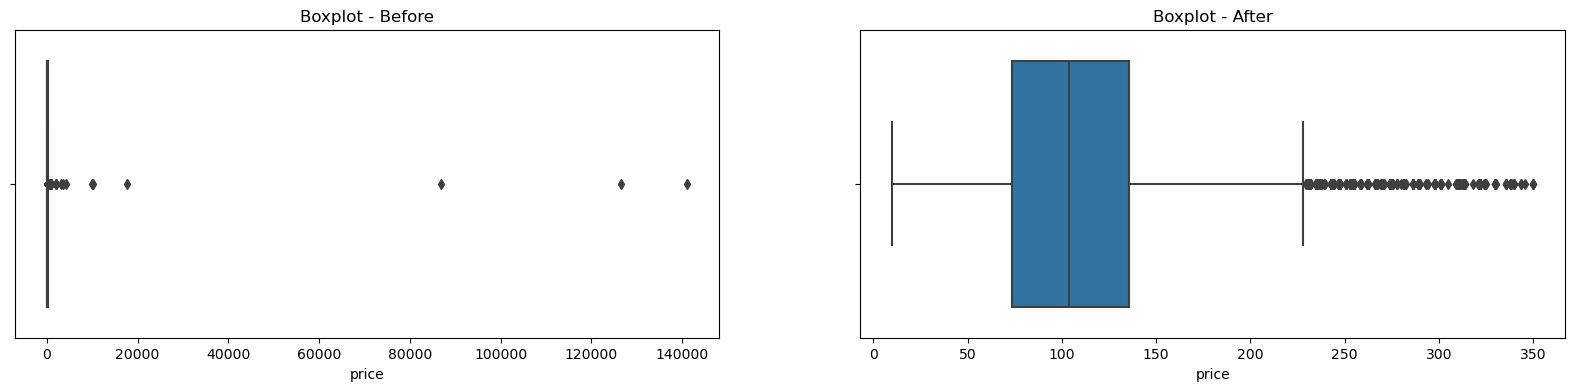

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(df['price'], ax=axes[0])
axes[0].set_title('Boxplot - Before')
axes[0].set_xlabel('price')

df.loc[(df['price'] > 350) | (df['price'] < 10), 'price'] = np.nan
mean_value = df['price'].mean()
df['price'] = df['price'].fillna(mean_value)

sns.boxplot(df['price'], ax=axes[1])
axes[1].set_title('Boxplot - After')
axes[1].set_xlabel('price')

In [9]:
#sort: check head+tail
df_sorted=df.sort_values(by='price', ascending=False)
df_sorted

,name,location,at_student_home,at_online,at_teacher_home,rate,review,price,languages,picture,...,18-64,4-6,65+,7-12,Advanced,Beginner,Intermediate,region_code,location_code,highest_education
2289,Olivia,Switzerland,1.0,1,1.0,5.0,1,349.78,3,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,6,2
6193,Christian,Switzerland,1.0,1,1.0,0.0,0,349.78,2,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,6,0
5865,Juan,Switzerland,1.0,1,1.0,0.0,0,349.78,3,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,6,2
5582,Aleksander,Switzerland,0.0,1,1.0,5.0,1,345.80,1,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,6,1
2756,Thomas,Austria,0.0,1,0.0,5.0,14,343.53,3,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Abdelrhman,Egypt,0.0,1,0.0,0.0,0,10.90,3,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,18,0
1160,Saravana,India,0.0,1,0.0,0.0,0,10.71,2,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8,26,0
3603,Rasha,Egypt,0.0,1,1.0,5.0,1,10.09,3,0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,18,0
4626,Andrew,Egypt,1.0,1,0.0,0.0,0,10.09,2,0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,18,0


In [10]:
df.columns.to_list()

['name',
 'location',
 'at_student_home',
 'at_online',
 'at_teacher_home',
 'rate',
 'review',
 'price',
 'languages',
 'picture',
 'seniority',
 'trusted_teacher',
 "Bachelor's degree",
 "Master's degree",
 'Other studies',
 'PhD',
 'Student',
 'Teach Arabic',
 'Teach Business',
 'Teach Computers',
 'Teach English',
 'Teach French',
 'Teach Humanities',
 'Teach Language Skills',
 'Teach Math',
 'Teach Music',
 'Teach Other Languages',
 'Teach Sciences',
 'Teach Spanish',
 'Teach Sports',
 'Teach Telecommunications',
 'Tech Arts',
 'region',
 '0-3',
 '13-17',
 '18-64',
 '4-6',
 '65+',
 '7-12',
 'Advanced',
 'Beginner',
 'Intermediate',
 'region_code',
 'location_code',
 'highest_education']

(array([ 171.,  283.,  703.,  920.,  852., 1210.,  568.,  678.,  412.,
         373.,  162.,  154.,  197.,   73.,   51.,   70.,   25.,   34.,
          22.,   17.]),
 array([ 10.05  ,  27.0365,  44.023 ,  61.0095,  77.996 ,  94.9825,
        111.969 , 128.9555, 145.942 , 162.9285, 179.915 , 196.9015,
        213.888 , 230.8745, 247.861 , 264.8475, 281.834 , 298.8205,
        315.807 , 332.7935, 349.78  ]),
 <BarContainer object of 20 artists>)

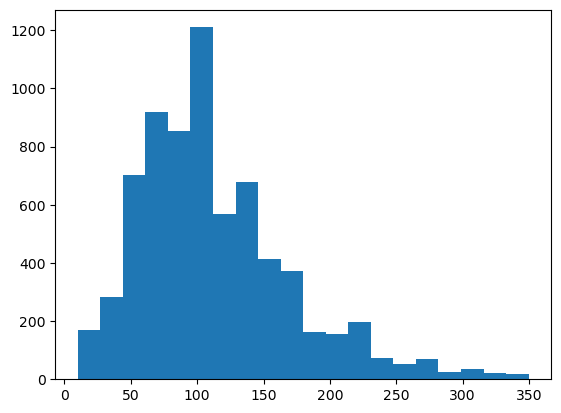

In [11]:
plt.hist(df.price,bins=20)

Text(0.5, 0, 'languages')

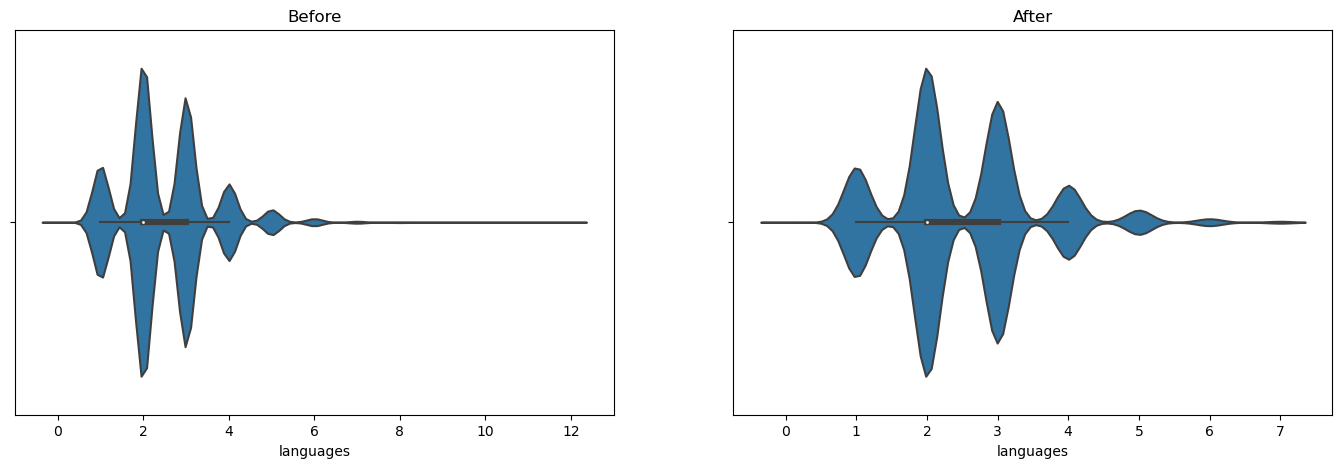

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(17, 5))
sns.violinplot(df['languages'], ax=axes[0])
axes[0].set_title('Before')
axes[0].set_xlabel('languages')

df.loc[df['languages'] > 7, 'languages'] = np.nan
mean_value = df['languages'].mean()
df['languages'] = df['languages'].fillna(mean_value).astype(int)

sns.violinplot(df['languages'], ax=axes[1])
axes[1].set_title('After')
axes[1].set_xlabel('languages')

In [13]:
print(df['at_student_home'].value_counts())
print(df['at_online'].value_counts())
print(df['at_teacher_home'].value_counts())
print(df['picture'].value_counts())
print(df['trusted_teacher'].value_counts())
print(df["Bachelor's degree"].value_counts())
print(df["Master's degree"].value_counts())
print(df['Other studies'].value_counts())
print(df['PhD'].value_counts())
print(df['Student'].value_counts())
print(df['at_student_home'].value_counts())

0.0    3904
1.0    3071
Name: at_student_home, dtype: int64
1    6971
0       4
Name: at_online, dtype: int64
0.0    4362
1.0    2613
Name: at_teacher_home, dtype: int64
0    6912
1      63
Name: picture, dtype: int64
1.0    5126
0.0    1849
Name: trusted_teacher, dtype: int64
0    4700
1    2275
Name: Bachelor's degree, dtype: int64
0    5007
1    1968
Name: Master's degree, dtype: int64
0    4681
1    2294
Name: Other studies, dtype: int64
0    6770
1     205
Name: PhD, dtype: int64
0    6670
1     305
Name: Student, dtype: int64
0.0    3904
1.0    3071
Name: at_student_home, dtype: int64


In [14]:
print(df['Teach Arabic'].value_counts())
print(df['Teach Business'].value_counts())
print(df['Teach Computers'].value_counts())
print(df['Teach English'].value_counts())
print(df['Teach French'].value_counts())
print(df["Teach Humanities"].value_counts())
print(df["Teach Language Skills"].value_counts())
print(df['Teach Math'].value_counts())
print(df['Teach Music'].value_counts())
print(df['Teach Other Languages'].value_counts())
print(df['Teach Sciences'].value_counts())
print(df['Teach Spanish'].value_counts())
print(df['Teach Sports'].value_counts())
print(df['Teach Telecommunications'].value_counts())
print(df['Tech Arts'].value_counts())

0    6735
1     240
Name: Teach Arabic, dtype: int64
0    6659
1     316
Name: Teach Business, dtype: int64
0    6489
1     486
Name: Teach Computers, dtype: int64
0    5420
1    1555
Name: Teach English, dtype: int64
0    6289
1     686
Name: Teach French, dtype: int64
0    6601
1     374
Name: Teach Humanities, dtype: int64
0    6066
1     909
Name: Teach Language Skills, dtype: int64
0    5900
1    1075
Name: Teach Math, dtype: int64
0    5693
1    1282
Name: Teach Music, dtype: int64
0    5863
1    1112
Name: Teach Other Languages, dtype: int64
0    6048
1     927
Name: Teach Sciences, dtype: int64
0    6385
1     590
Name: Teach Spanish, dtype: int64
0    6621
1     354
Name: Teach Sports, dtype: int64
0    6727
1     248
Name: Teach Telecommunications, dtype: int64
0    6744
1     231
Name: Tech Arts, dtype: int64


## Visualization

AxesSubplot(0.22375,0.11;0.5775x0.77)
{"Bachelor's degree": 3, "Master's degree": 2, 'Other studies': 4, 'PhD': 1, 'Student': 5}


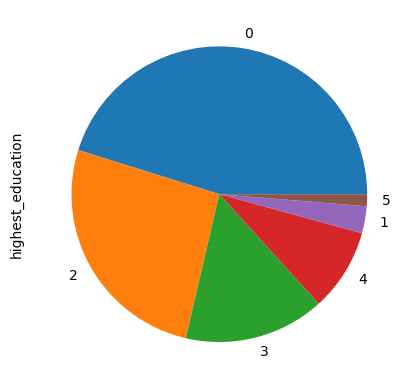

In [15]:
print(df['highest_education'].value_counts().plot(kind="pie"))
print(education_dict)

<AxesSubplot:title={'center':'at_online'}, ylabel='at_online'>

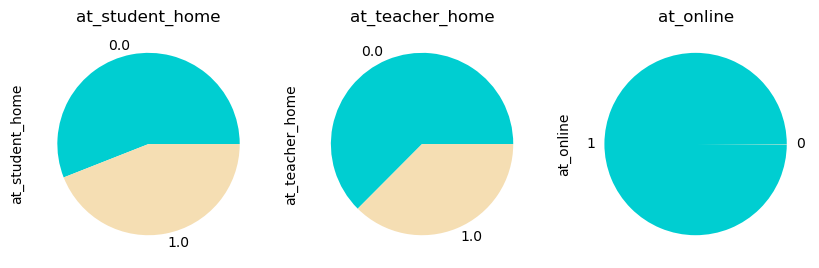

In [16]:
mycolors = ["darkturquoise", 'wheat']
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
df['at_student_home'].value_counts().plot(kind='pie', colors=mycolors, ax=axes[0], title="at_student_home")
df['at_teacher_home'].value_counts().plot(kind='pie', colors=mycolors, ax=axes[1], title="at_teacher_home")
df['at_online'].value_counts().plot(kind='pie', colors=mycolors, ax=axes[2], title="at_online")

Text(0, 0.5, 'Count')

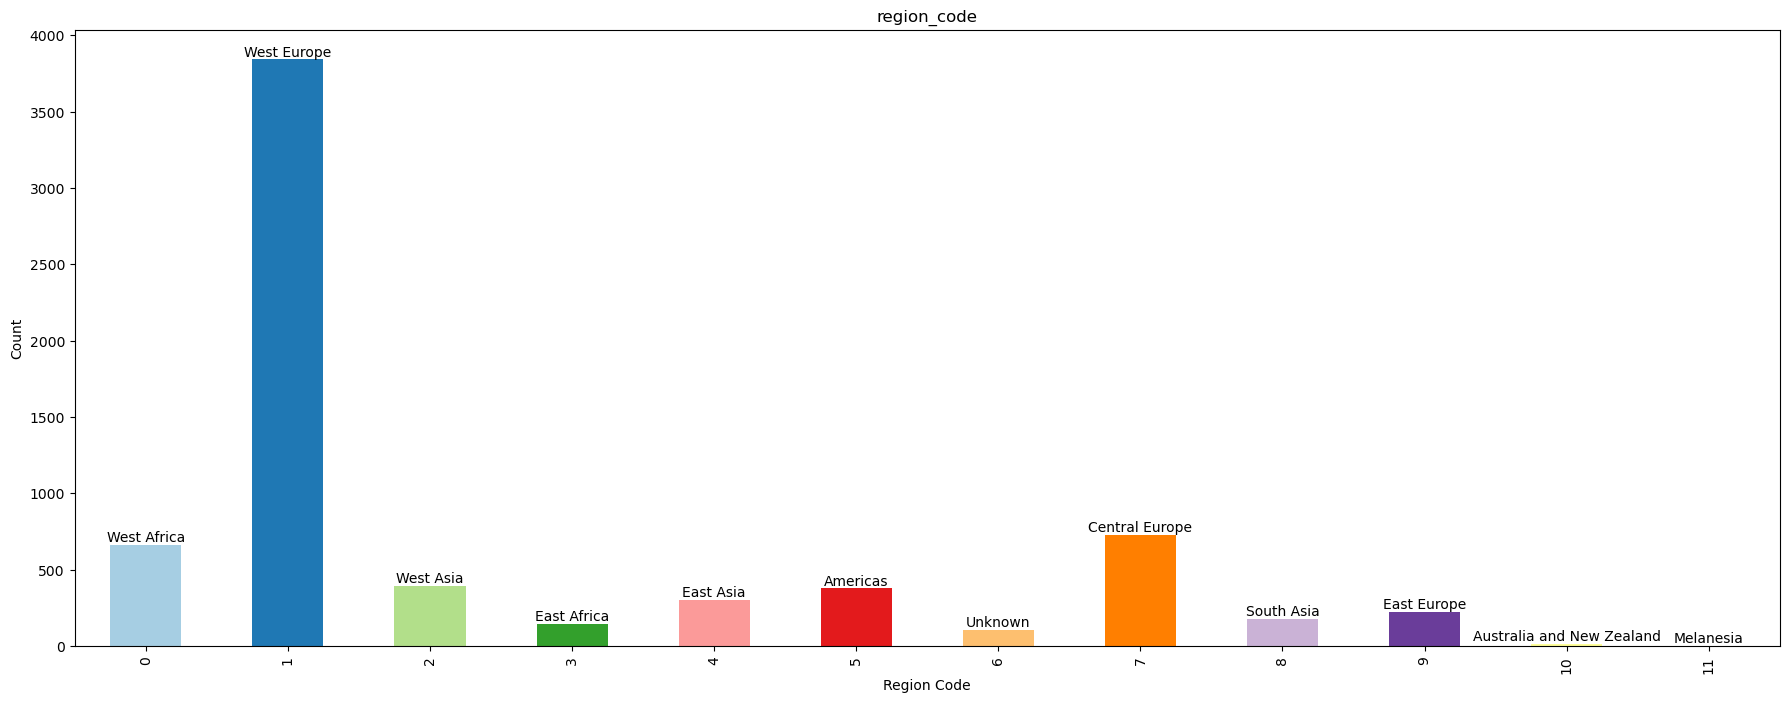

In [17]:
value_counts = df['region_code'].value_counts()
region_dict = {
    0: "West Africa", 1: "West Europe", 2: "West Asia", 3: "East Africa", 
    4: "East Asia", 5: "Americas", 6: "Unknown", 7: "Central Europe", 
    8: "South Asia", 9: "East Europe", 10: "Australia and New Zealand", 11: "Melanesia"
}
# Reindex the value_counts series with all region codes and fill missing values with zero
value_counts = value_counts.reindex(range(len(region_dict)), fill_value=0)
plt.figure(figsize=(22, 8))
# Specify a color palette with 11 different colors
colors = sns.color_palette('Paired', n_colors=len(region_dict))
ax = value_counts.plot(kind='bar', title="region_code", color=colors)
# Add annotations to the bars
for i, count in enumerate(value_counts):
    region_name = region_dict.get(i)
    ax.annotate(f"{region_name}", xy=(i, count), ha='center', va='bottom')
plt.xlabel("Region Code")
plt.ylabel("Count")

<AxesSubplot:xlabel='price', ylabel='highest_education'>

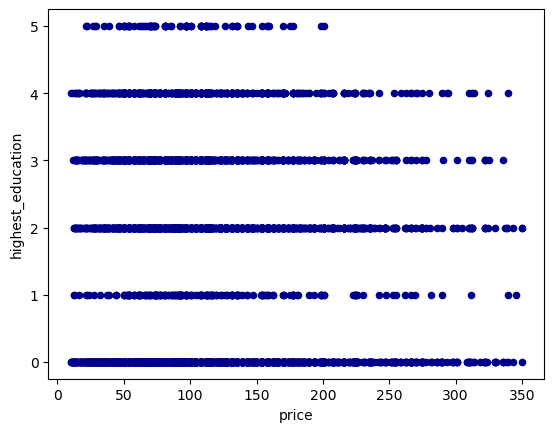

In [18]:
df.plot.scatter(x='price',y='highest_education', c='DarkBlue')

<AxesSubplot:xlabel='at_online,at_student_home,at_teacher_home'>

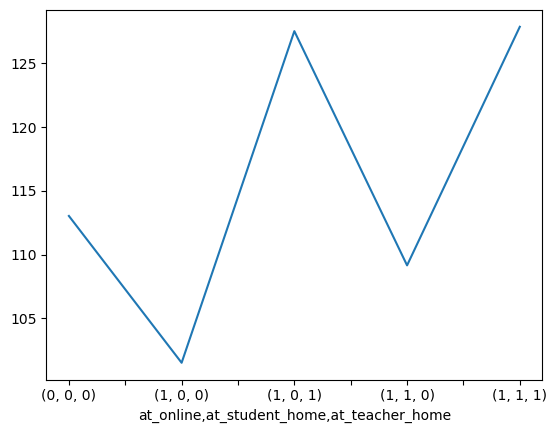

In [19]:
df['at_student_home'] = df['at_student_home'].astype(int)
df['at_online'] = df['at_online'].astype(int)
df['at_teacher_home'] = df['at_teacher_home'].astype(int)

# Group by the converted columns and calculate the mean of 'price'
pokemon = df.groupby(['at_online', 'at_student_home', 'at_teacher_home'])['price'].mean()

# Plot the resulting Series
pokemon.plot()

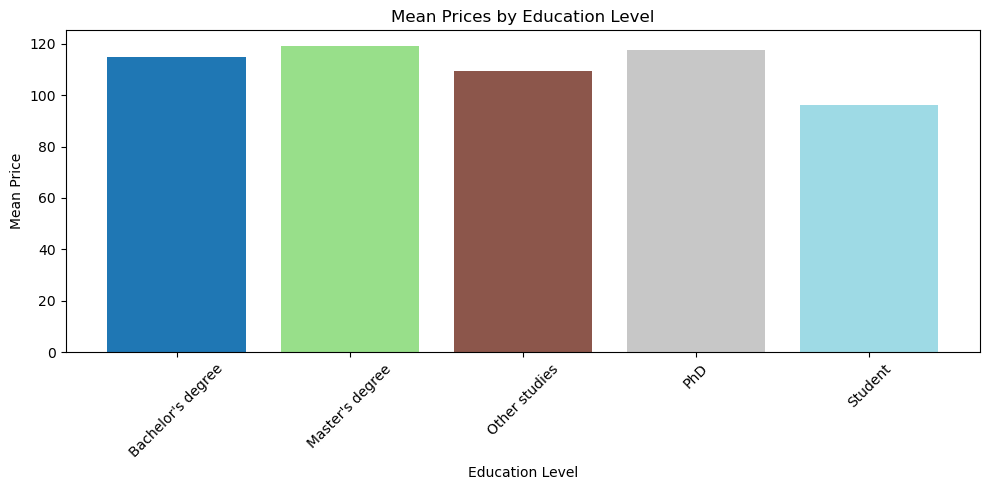

In [20]:
education_levels = ["Bachelor's degree", "Master's degree", 'Other studies', 'PhD', "Student"]
mean_prices = pd.DataFrame(columns=['Education Level', 'Mean Price'])
for level in education_levels:
    level_mean = df[df[level] == 1]['price'].mean()
    mean_prices = mean_prices.append({'Education Level': level, 'Mean Price': level_mean}, ignore_index=True)
mean_prices.sort_values('Education Level', inplace=True)
colors = plt.cm.get_cmap('tab20', len(mean_prices))
plt.figure(figsize=(10, 5))
plt.bar(mean_prices['Education Level'], mean_prices['Mean Price'], color=colors(range(len(mean_prices))))
plt.xlabel('Education Level')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0, 0.5, 'Price')

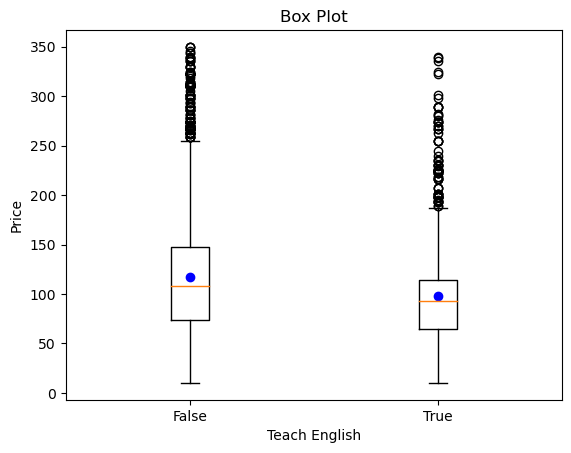

In [21]:
plt.boxplot([df[df['Teach English'] == 0]['price'],
             df[df['Teach English'] == 1]['price']], labels=['False', 'True'])
mean_values = [df[df['Teach English'] == 0]['price'].mean(),
               df[df['Teach English'] == 1]['price'].mean()]
plt.scatter([1, 2], mean_values, color='blue', marker='o', label='Mean')
plt.title('Box Plot')
plt.xlabel('Teach English')
plt.ylabel('Price')

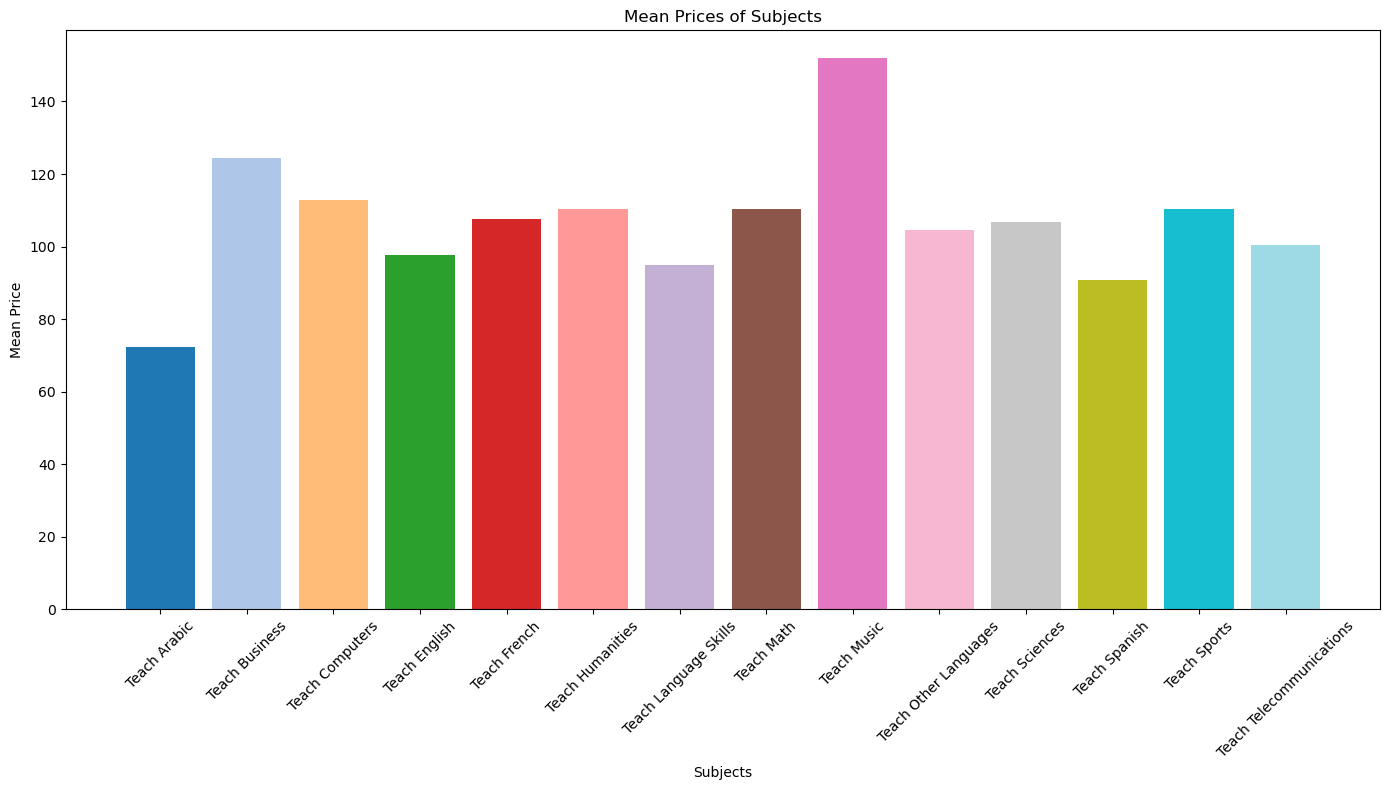

In [22]:
subject_cols = ['Teach Arabic', 'Teach Business', 'Teach Computers', 'Teach English',
                'Teach French', 'Teach Humanities', 'Teach Language Skills', 'Teach Math',
                'Teach Music', 'Teach Other Languages', 'Teach Sciences', 'Teach Spanish',
                'Teach Sports', 'Teach Telecommunications']
mean_prices = pd.DataFrame(columns=['Subject', 'Mean Price'])
for col in subject_cols:
    subject_mean = df[df[col] == 1]['price'].mean()
    mean_prices = mean_prices.append({'Subject': col, 'Mean Price': subject_mean}, ignore_index=True)
mean_prices.sort_values('Subject', inplace=True)
colors = plt.cm.get_cmap('tab20', len(mean_prices))
plt.figure(figsize=(14, 8))
plt.bar(mean_prices['Subject'], mean_prices['Mean Price'], color=colors(range(len(mean_prices))))
plt.xlabel('Subjects')
plt.ylabel('Mean Price')
plt.title('Mean Prices of Subjects')
plt.xticks(rotation=45)
plt.tight_layout()

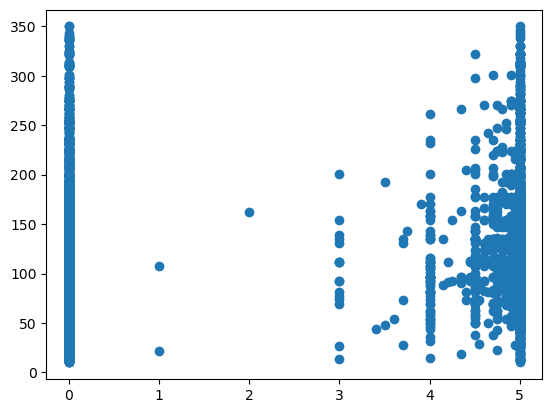

In [23]:
plt.scatter(df.rate, df.price)

Text(0, 0.5, 'mean price')

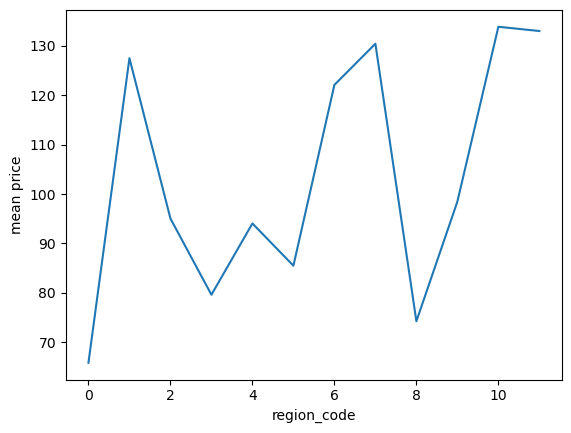

In [24]:
df.groupby('region_code').price.mean().plot(kind='line')
plt.ylabel("mean price")

<AxesSubplot:xlabel='review'>

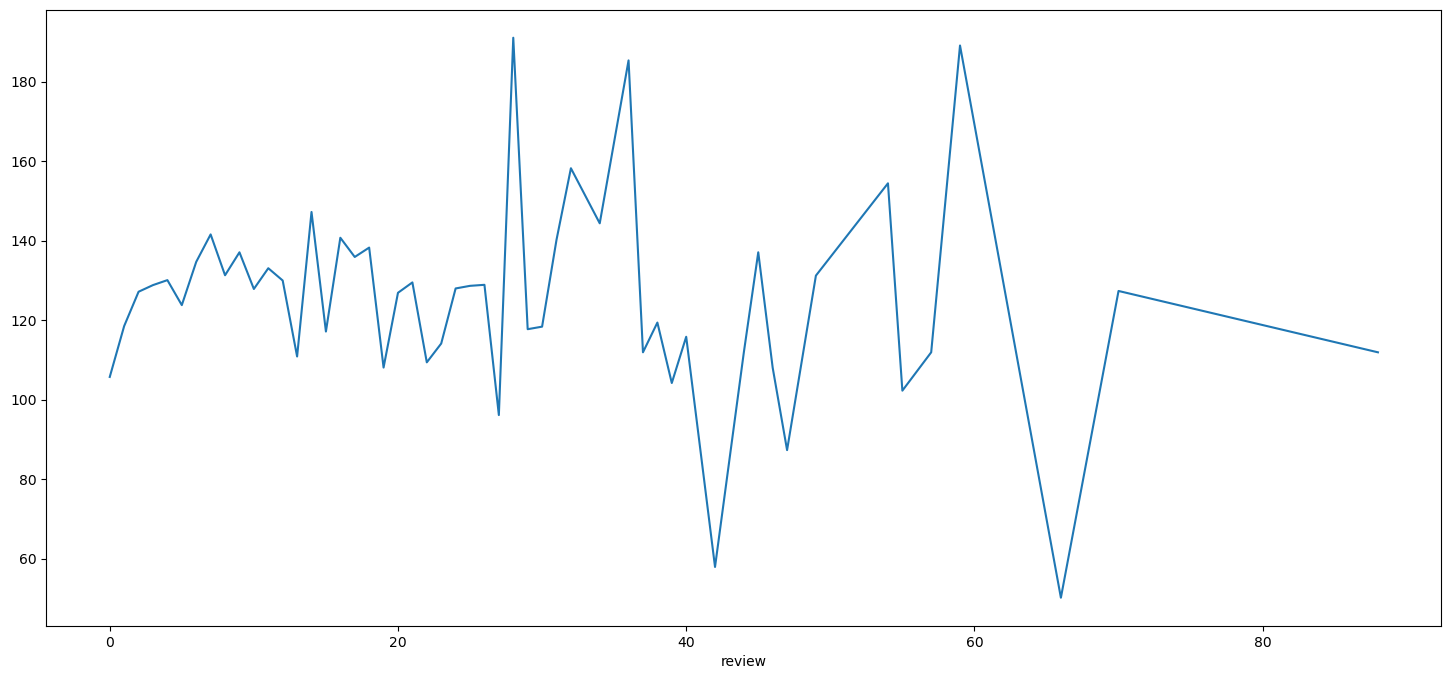

In [25]:
df.groupby(['review']).mean()['price'].plot(figsize=(18, 8))

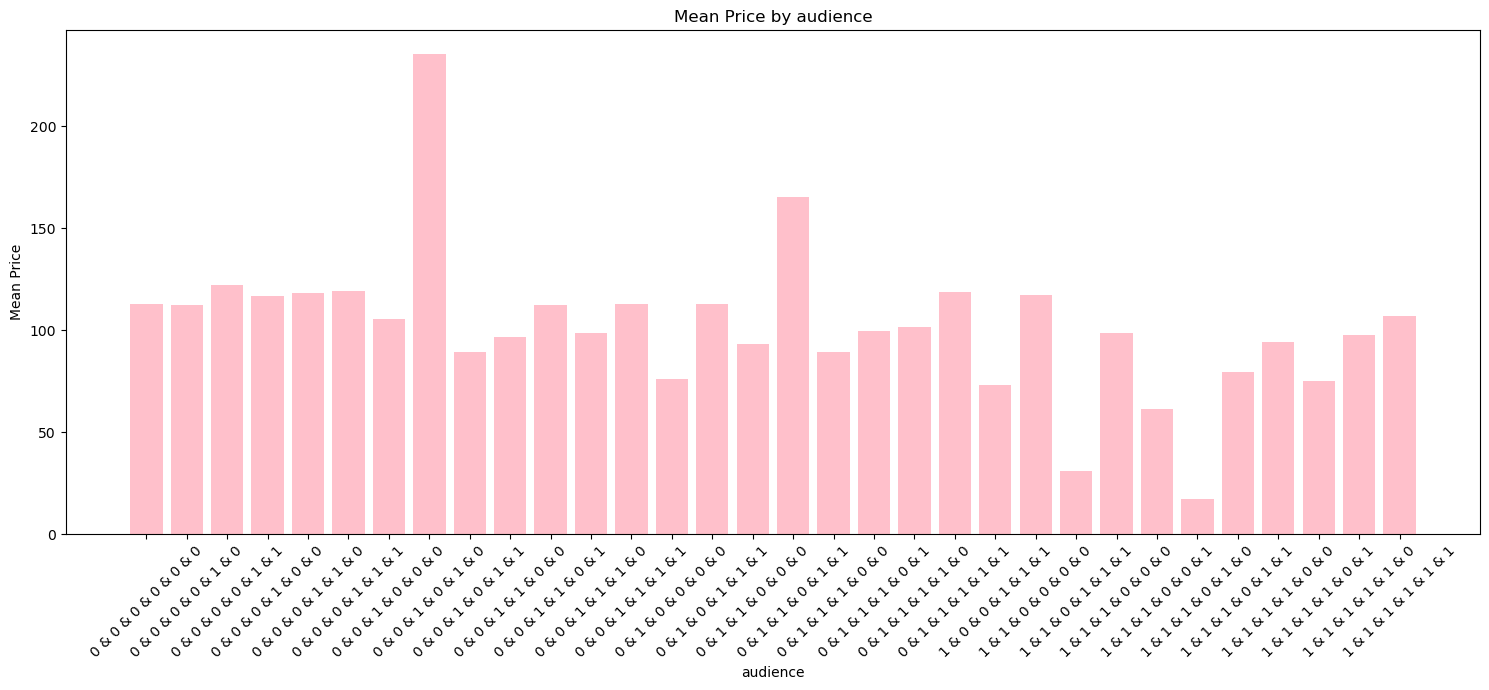

In [26]:
binary_columns = ['0-3', "4-6","7-12", '13-17', '18-64', "65+"]  # List of binary columns
price_column = 'price'
mean_prices = df.groupby(binary_columns)[price_column].mean().reset_index()
mean_prices[binary_columns] = mean_prices[binary_columns].astype(int)

# Get the labels for the x-axis
labels = [' & '.join(map(str, row)) for row in mean_prices[binary_columns].values]
plt.figure(figsize=(15, 7))
plt.bar(labels, mean_prices[price_column], color='pink')
plt.xlabel('audience')
plt.ylabel('Mean Price')
plt.title('Mean Price by audience')
plt.xticks(rotation=45)
plt.tight_layout()

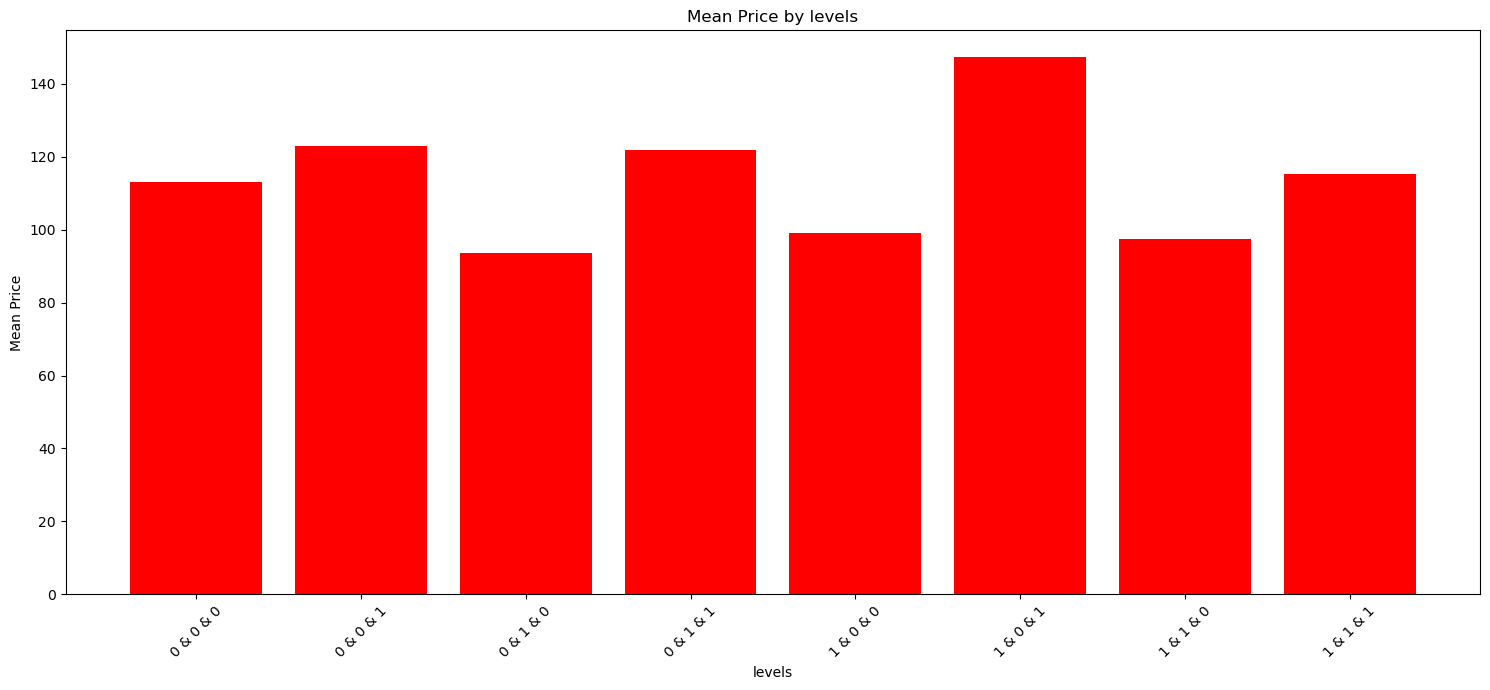

In [27]:
binary_columns = ['Beginner','Intermediate','Advanced']  # List of binary columns
price_column = 'price'
mean_prices = df.groupby(binary_columns)[price_column].mean().reset_index()
mean_prices[binary_columns] = mean_prices[binary_columns].astype(int)

# Get the labels for the x-axis
labels = [' & '.join(map(str, row)) for row in mean_prices[binary_columns].values]
plt.figure(figsize=(15, 7))
plt.bar(labels, mean_prices[price_column], color='red')
plt.xlabel('levels')
plt.ylabel('Mean Price')
plt.title('Mean Price by levels')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0, 0.5, 'price')

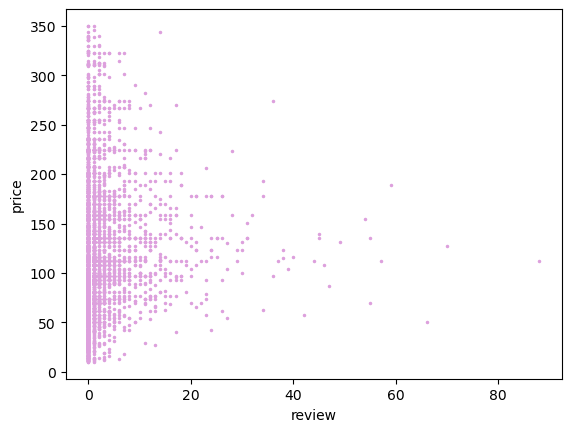

In [28]:
plt.plot(df['review'], df['price'],'o',markersize=1.5, color='plum')
plt.xlabel('review')
plt.ylabel('price')

In [29]:
ct1=pd.crosstab(df['highest_education'],df["location_code"],normalize='index')
ct1

location_code,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
highest_education,,,,,,,,,,,,,,,,,,,,,
0,0.034275,0.101555,0.048239,0.007299,0.000635,0.007617,0.057442,0.085370,0.007617,0.002539,...,0.000317,0.000000,0.000000,0.000000,0.000317,0.000000,0.000317,0.000000,0.000000,0.000000
1,0.097561,0.078049,0.073171,0.004878,0.000000,0.009756,0.039024,0.092683,0.004878,0.004878,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004878,0.000000,0.000000
2,0.033406,0.125411,0.035049,0.012048,0.001643,0.001643,0.069551,0.134721,0.004929,0.001095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000548
3,0.067164,0.104478,0.038246,0.004664,0.000933,0.008396,0.045709,0.074627,0.013993,0.001866,...,0.000000,0.000000,0.000933,0.000933,0.000000,0.000933,0.000000,0.000000,0.000000,0.000000
4,0.033333,0.092063,0.033333,0.001587,0.000000,0.011111,0.058730,0.074603,0.003175,0.003175,...,0.000000,0.001587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001587,0.000000
5,0.076923,0.142857,0.021978,0.000000,0.000000,0.043956,0.032967,0.076923,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
chi2_contingency(ct1)

(2.008144623019245,
 1.0,
 825,
 array([[5.71104585e-02, 1.07402137e-01, 4.16693830e-02, 5.07949872e-03,
         5.35081723e-04, 1.37463900e-02, 5.05705917e-02, 8.98210782e-02,
         5.76510417e-03, 2.25874840e-03, 1.53267112e-03, 8.33006012e-03,
         1.49863353e-03, 6.59430564e-02, 1.11260106e-01, 8.21206132e-02,
         2.27851651e-03, 7.05988643e-03, 2.48432097e-02, 2.29706857e-02,
         1.29341609e-02, 1.54313836e-02, 1.40927306e-02, 7.79197723e-03,
         7.68550573e-03, 1.31095204e-02, 1.62536067e-02, 8.52525249e-04,
         1.71029053e-03, 3.74819359e-03, 7.49464997e-03, 1.15959466e-02,
         3.99369794e-03, 1.38634876e-03, 5.61487157e-03, 3.67136015e-03,
         1.41065045e-03, 6.95425663e-03, 1.44167449e-04, 3.38766428e-03,
         7.73104211e-03, 5.78702686e-04, 7.06033646e-03, 3.99446142e-03,
         2.49684206e-03, 4.42944213e-03, 3.26678435e-03, 4.20003095e-03,
         1.55472637e-04, 1.97753089e-03, 2.35441637e-04, 4.05426609e-04,
         1.35251715

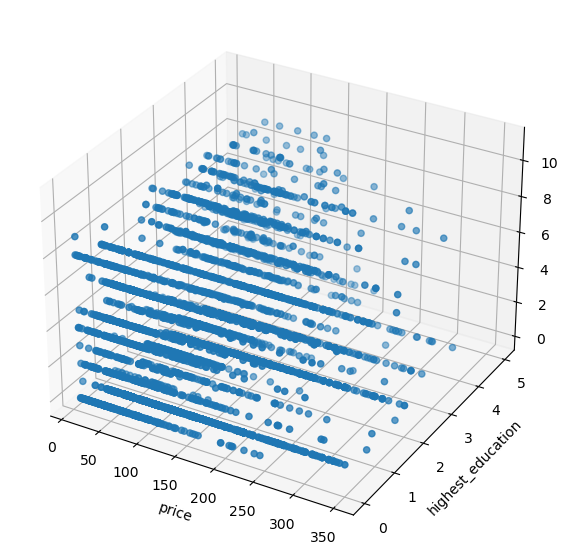

In [31]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')
xdata=df['price']
ydata=df["highest_education"]
zdata=df["region_code"]
plt.xlabel('price')
plt.ylabel('highest_education')
ax.scatter3D(xdata,ydata,zdata,depthshade=True)

## Delete columns
The columns 'picture', 'trusted_teacher', and 'at_online' have been removed from the dataset. 

This was done to simplify the dataset and remove any irrelevant information . 

In [32]:
df = df.drop(columns=['picture',"trusted_teacher","at_online"])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975 entries, 0 to 6974
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      6975 non-null   object 
 1   location                  6975 non-null   object 
 2   at_student_home           6975 non-null   int32  
 3   at_teacher_home           6975 non-null   int32  
 4   rate                      6975 non-null   float64
 5   review                    6975 non-null   int64  
 6   price                     6975 non-null   float64
 7   languages                 6975 non-null   int32  
 8   seniority                 6975 non-null   int64  
 9   Bachelor's degree         6975 non-null   int64  
 10  Master's degree           6975 non-null   int64  
 11  Other studies             6975 non-null   int64  
 12  PhD                       6975 non-null   int64  
 13  Student                   6975 non-null   int64  
 14  Teach Ar

## Export

In [34]:
df.to_csv("C:\\Users\\talta\\OneDrive - Open University of Israel\\שולחן העבודה\\פרויקט סופי מדעי הנתונים\\Final_clean_Data.csv")

# 5.Mechine lerning
## imports

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#Classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
#Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#SVM classifier
from sklearn.svm import SVC
# metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

## Load data

In [36]:
def load_dataset(file_name, label_column):
    df=pd.read_csv(file_name)
    df2=df._get_numeric_data().copy()
    x_label=df2.columns[df2.columns!=label_column]
    y=df2[label_column]
    X=df2[x_label]
    return X, y

In [37]:
target_column = 'price'
X, y = load_dataset('Final_clean_Data.csv', target_column)
print("Dataset shape:", X.shape, y.shape)

Dataset shape: (6975, 39) (6975,)


## Split to train and test
We used a 80/20 split, where 80% of the data is used for training, and the remaining 20% is used for testing.

In [38]:
test_ratio, rand_state = 0.25, 42

In [39]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y, test_ratio, rand_state)

print(f"{X_train} and {X_test}\n")
print(f"{y_train} and {y_test}\n")

print(f"{len(X_train)}")
print(f"{len(X_test)}")
print(f"{len(y_train)}")
print(f"{len(y_test)}")

      Unnamed: 0  at_student_home  at_teacher_home  rate  review  languages  \
3289        3289                1                0   5.0       3          3   
3353        3353                1                1   5.0       1          2   
3172        3172                1                1   5.0       1          4   
5071        5071                0                1   0.0       0          3   
6823        6823                0                1   0.0       0          3   
...          ...              ...              ...   ...     ...        ...   
3772        3772                1                0   5.0       2          3   
5191        5191                1                0   0.0       0          5   
5226        5226                1                1   4.9       8          3   
5390        5390                0                1   5.0       4          1   
860          860                0                0   0.0       0          3   

      seniority  Bachelor's degree  Master's degree

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975 entries, 0 to 6974
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                6975 non-null   int64  
 1   at_student_home           6975 non-null   int64  
 2   at_teacher_home           6975 non-null   int64  
 3   rate                      6975 non-null   float64
 4   review                    6975 non-null   int64  
 5   languages                 6975 non-null   int64  
 6   seniority                 6975 non-null   int64  
 7   Bachelor's degree         6975 non-null   int64  
 8   Master's degree           6975 non-null   int64  
 9   Other studies             6975 non-null   int64  
 10  PhD                       6975 non-null   int64  
 11  Student                   6975 non-null   int64  
 12  Teach Arabic              6975 non-null   int64  
 13  Teach Business            6975 non-null   int64  
 14  Teach Co

## models

we tried 2 different models: linear regression and random forest regressor.

In [42]:
def train_1st_model(X_train, y_train):
    trained_model = LinearRegression().fit(X_train,y_train)
    predicted = trained_model.score(X_train,y_train)
    return trained_model, predicted
def predict_1st(trained_1st_model, X_test):
    predicted_vals = trained_1st_model.predict(X_test)    
    return predicted_vals
def evaluate_performance_1st(y_test,y_predicted):
    evaluate_value = r2_score(y_true=y_test,y_pred=y_predicted)
    return evaluate_value

In [43]:
### LinearRegression ###
trained_model_LR,predicted_LR = train_1st_model(X_train, y_train)
predicted_vals_LR = predict_1st(trained_model_LR, X_test)
evaluate_value_LR = evaluate_performance_1st(y_test,predicted_vals_LR)


In [44]:
###RandomForestRegressor###
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300, random_state=45).fit(X, y)


# 6. Evaluation 
## LinearRegression

In [45]:
print(f"predicted LR:{predicted_LR}\nf1_score:{evaluate_value_LR}")

predicted LR:0.19286214621850284
f1_score:0.21057684492672435


## RandomForestRegressor

In [46]:
print(model.score(X_test, y_test))

0.9141378753101608


#  7.Conclusions
The aim of our project was to predict the price of private tutors based on various factors such as their experience, location, subject and qualifications.

After collecting our data, we analyzed it using accurate statistical and graphical techniques to identify the factors that influence the hourly rates of private tutors.

Our analysis revealed that experience and education were the most significant predictors of hourly rates, while location and subject matter also played a role.

We discovered that in certain geographic locations, for exemple Central European , the price significantly high than in the West African region.

Overall, our project provided different and diverse insights into the factors that influence the prices of private tutors.

By understanding these factors, we have been able to better predict and manage the costs of private tutoring services, making them more accessible and affordable for students and families.